<hr/>

# Comparison on Classification Algorithms and Ensembling Learning

**Students**: Ruikang Liang, Xiaoya Zhang, Fan Lu, Mingzhong Gao, Zexi Ding <br/>

<hr/>

- In this project, we will use "Happy House Data" as data set, try to use different classification algorithms to classify different face and judge whether they are similing. It seems like there is a smile detector which allows you to enter a house if and only if you are smiling.

## The description of data set: 
(Data are From Kaggle Site)

#### Context

This dataset was uploaded as because I didn't came across no quickly available sources for the happy house problem. So, I took this dataset from Deep Learning Specialization - Course 4 - Convolutional Neural Networks, to give easy access to everyone on Kaggle to play around with it.

#### Content

Contains 2 *.h5 files One is the train dataset One is the test dataset

Here's some boilerplate code to get you started with loading the dataset! Note: The code is borrowed from the Deep Learning Specialization Assignment which introduces this problem.

#### Acknowledgements

Deep Learning Specialization - Andrew Ng and the whole deeplearning.ai team. Image taken from Pexels: https://www.pexels.com/photo/cute-family-picture-160994/

#### About this file

This dataset can be used to solve the Happy House problem. Where, we allow a person to enter the house only if he/she is smiling! So, a smile detector!

The train set has 600 examples. The test set has 150 examples.

Source: This dataset is gathered from the Deep Learning Specialization - Convolutional Neural Network Course - Week 2 - Happy House Exercise.

Look in the Overview section, for the code to load the train and test files.

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (4,3)
import numpy as np
import h5py
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy

Populating the interactive namespace from numpy and matplotlib


## Reading Data Set

In [2]:
def load_dataset():
    train_data = h5py.File('train_happy.h5', "r")
    x_train = np.array(train_data["train_set_x"][:]) 
    y_train = np.array(train_data["train_set_y"][:]) 

    test_data = h5py.File('test_happy.h5', "r")
    x_test = np.array(test_data["test_set_x"][:])
    y_test = np.array(test_data["test_set_y"][:]) 
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return x_train, y_train, x_test, y_test

y = 0


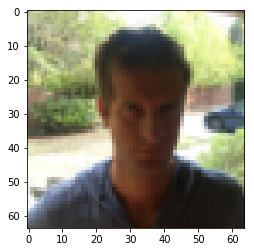

In [3]:
X_train, Y_train, X_test, Y_test = load_dataset()
Y_train = Y_train.T
Y_test = Y_test.T
index = 41
plt.imshow(X_train[index])
print ("y = " + str(np.squeeze(Y_train[index, :])))

y = 1


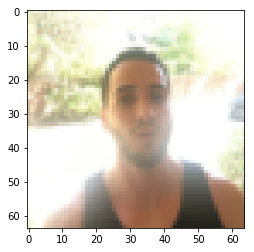

In [4]:
index = 42
plt.imshow(X_train[index])
print ("y = " + str(np.squeeze(Y_train[index, :])))

In [5]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


## Convolution (Filter) Analysis

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def to_grayscale(img):
    h = len(img)
    w = len(img[0])
    new_img = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            new_img[i][j] = int(img[i][j][0] * 0.3 + img[i][j][1] * 0.59 + img[i][j][2] * 0.11)
    return new_img

In [8]:
def create_dummy_image(h=64, w=64):
    img = np.zeros((h, w))
    img[:h//2,:w//2] = 255
    img[h//2:,:w//2] = 200
    img[h//2:,w//2:] = 100
    return img

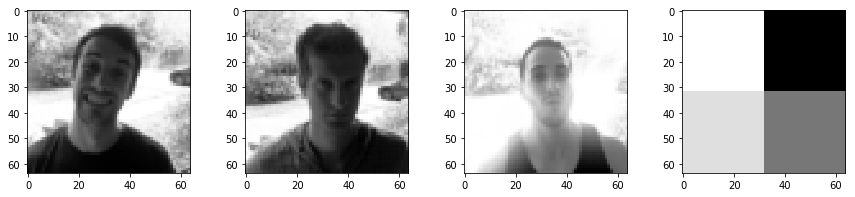

In [9]:
img1 = to_grayscale(X_train[5])
img2 = to_grayscale(X_train[41])
img3 = to_grayscale(X_train[42])
dummy_img = create_dummy_image()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
axes[0].imshow(img1, cmap='Greys_r')
axes[1].imshow(img2, cmap='Greys_r')
axes[2].imshow(img3, cmap='Greys_r')
axes[3].imshow(dummy_img, cmap='Greys_r')
plt.show()

In [10]:
def apply_conv_filter(img, conv_filter):
    h = len(img)
    w = len(img[0])
    hf = len(conv_filter)
    wf = len(conv_filter[0])
    h_off = hf // 2
    w_off = wf // 2
    new_img = np.zeros((h, w))
    for i in range(h_off, h - h_off):
        for j in range(w_off, w - w_off):
            new_value = 0
            for k in range(hf):
                for l in range(wf):
                    new_value += img[i - h_off + k][j - w_off + l] * conv_filter[k][l]
            new_img[i][j] = abs(new_value)
    return new_img

### Edge detection filters

In [11]:
# gradient filters
grad_v = [[-1, 0, 1]]
grad_h = [[-1],
          [0],
          [1]]
grad = [[-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]]

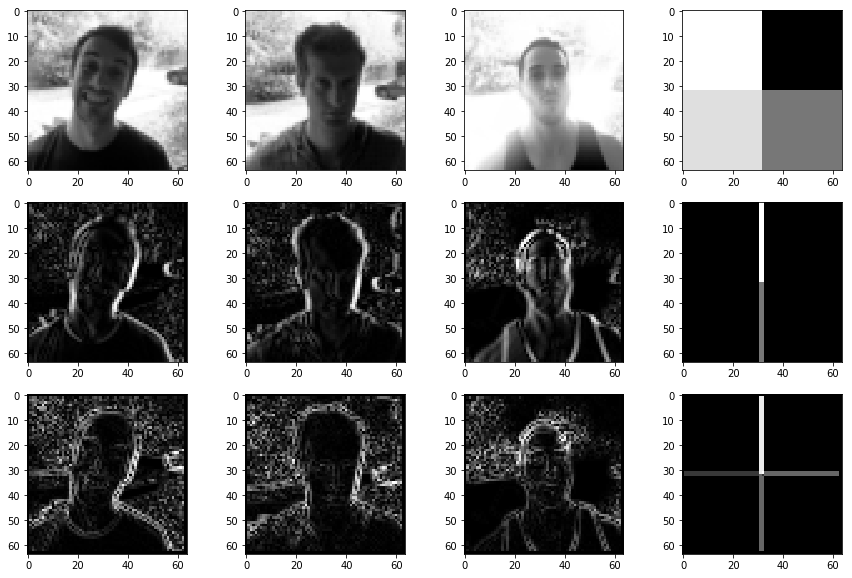

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes[0][0].imshow(img1, cmap='Greys_r')
axes[1][0].imshow(apply_conv_filter(img1, grad_v), cmap='Greys_r')
axes[2][0].imshow(apply_conv_filter(img1, grad), cmap='Greys_r')

axes[0][1].imshow(img2, cmap='Greys_r')
axes[1][1].imshow(apply_conv_filter(img2, grad_v), cmap='Greys_r')
axes[2][1].imshow(apply_conv_filter(img2, grad), cmap='Greys_r')

axes[0][2].imshow(img3, cmap='Greys_r')
axes[1][2].imshow(apply_conv_filter(img3, grad_v), cmap='Greys_r')
axes[2][2].imshow(apply_conv_filter(img3, grad), cmap='Greys_r')

axes[0][3].imshow(dummy_img, cmap='Greys_r')
axes[1][3].imshow(apply_conv_filter(dummy_img, grad_v), cmap='Greys_r')
axes[2][3].imshow(apply_conv_filter(dummy_img, grad), cmap='Greys_r')
plt.show()

### Blur filters

In [13]:
# Box filter
box_filter = np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]])
box_filter = (1/9) * box_filter
# Gaussian filter
gauss_filter = np.array([[1, 2, 1],
                          [2, 4, 2],
                          [1, 2, 1]])
gauss_filter = (1/16) * box_filter

In [14]:
# add some noise to the top-right corner of the dummy image
for i in range(32):
    for j in range(32):
        dummy_img[i][32+j] = random.randint(0, 25)

# and a singular point
dummy_img[42][42] = 255

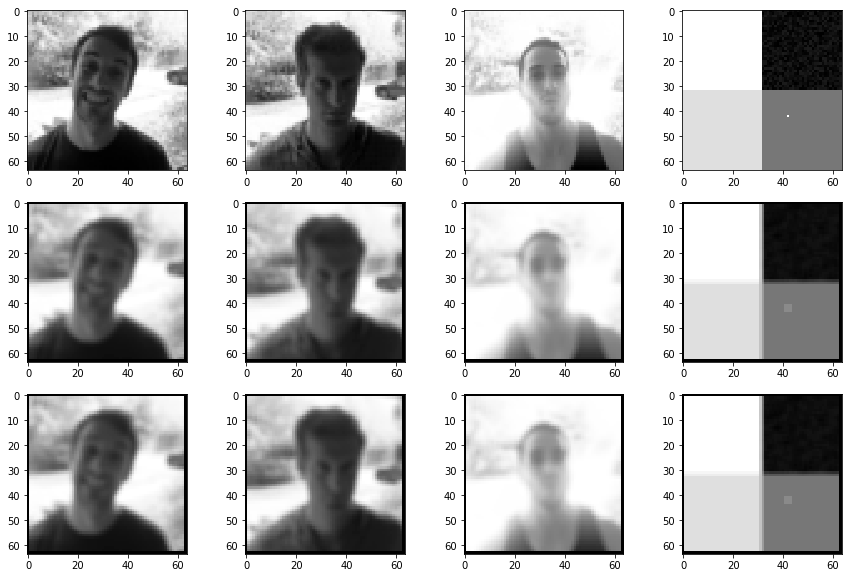

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes[0][0].imshow(img1, cmap='Greys_r')
axes[1][0].imshow(apply_conv_filter(img1, box_filter), cmap='Greys_r')
axes[2][0].imshow(apply_conv_filter(img1, gauss_filter), cmap='Greys_r')

axes[0][1].imshow(img2, cmap='Greys_r')
axes[1][1].imshow(apply_conv_filter(img2, box_filter), cmap='Greys_r')
axes[2][1].imshow(apply_conv_filter(img2, gauss_filter), cmap='Greys_r')

axes[0][2].imshow(img3, cmap='Greys_r')
axes[1][2].imshow(apply_conv_filter(img3, box_filter), cmap='Greys_r')
axes[2][2].imshow(apply_conv_filter(img3, gauss_filter), cmap='Greys_r')

axes[0][3].imshow(dummy_img, cmap='Greys_r')
axes[1][3].imshow(apply_conv_filter(dummy_img, box_filter), cmap='Greys_r')
axes[2][3].imshow(apply_conv_filter(dummy_img, gauss_filter), cmap='Greys_r')
plt.show()

## Principal Components Analysis

In [16]:
# PCA for dimension deduction
y_train=Y_train.reshape(-1)
y_test=Y_test.reshape(-1)
x_train=X_train.reshape(600,-1)
x_test=X_test.reshape(150,-1)
x_train=x_train.T
x_test=x_test.T

In [17]:
x_train.shape

(12288, 600)

In [18]:
from sklearn import decomposition

In [19]:
pca = decomposition.PCA(n_components=100, whiten=False)
B = pca.fit_transform(x_train.T).T
E, L = pca.components_.T, pca.explained_variance_

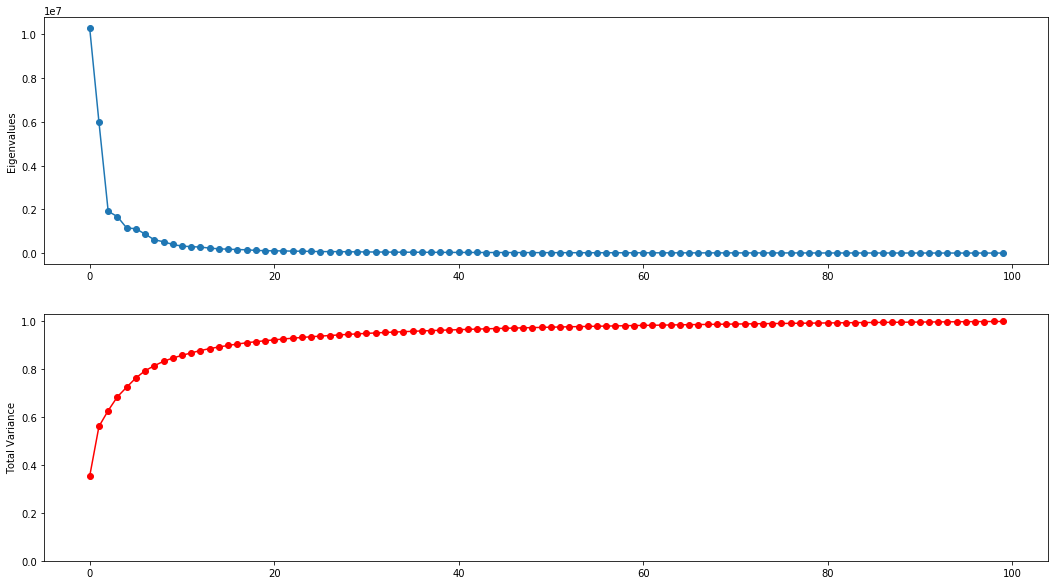

In [20]:
# Plot the eigenvalues
figure(figsize=(18,10)); ax=subplot(aspect='equal')

subplot(211); 
plot(L,'o-'); 
ylabel('Eigenvalues');

# Plot cumsum(Lambda) / sum(Lambda), i.e. how much variance are explained by first k PCs
subplot(212); 
cl = np.cumsum(L); 
ylabel('Total Variance');
plot(cl/cl[-1], 'o-r'); 
ylim(0, None);

#### Definitely, we choose 20 components as new features. 

In [21]:
pca = decomposition.PCA(n_components=20, whiten=False)
pcx_train = pca.fit_transform(x_train.T).T
pcx_test = pca.fit_transform(x_test.T).T

In [22]:
E, L = pca.components_.T, pca.explained_variance_
pcx_train = pcx_train.T
pcx_test = pcx_test.T
print(E)

[[-0.00943435 -0.00119916 -0.00703314 ... -0.0003671   0.00911722
  -0.00027762]
 [-0.00726506 -0.00045212 -0.00939625 ...  0.00038394  0.00911515
  -0.00341846]
 [-0.00820232  0.00183938 -0.01290371 ... -0.01056363  0.00983673
   0.0006031 ]
 ...
 [-0.00356694 -0.01140358 -0.00557443 ... -0.01428149  0.00721553
  -0.01748659]
 [-0.00110997 -0.01053203 -0.00990796 ... -0.01231473  0.01159673
  -0.02270985]
 [ 0.0003393  -0.008159   -0.00976115 ... -0.00841351  0.00767382
  -0.0140875 ]]


## $k$ Nearest Neighbors Classification

- Assign label or value based $k$ nearest neighbors ($k$-NN) in the training set

> For example, the most frequent "vote" possibly with weighting

> <img src=https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg width=200>

- Using $k$ instead of a distance cutoff helps with large density contrasts

In [23]:
from sklearn import neighbors
import datetime as dt

acu=[]
for k in range(5,15):
    clf = neighbors.KNeighborsClassifier(k)
    y_pred = clf.fit(pcx_train,y_train).predict(pcx_train)
    acu.append((y_train!=y_pred).sum()/600)

k_opt=5
acu_best=0
for k in range(5,15):
    if acu[k-5]>acu_best:
        acu_best,k_opt=acu[k-5],k

In [24]:
start = dt.datetime.now()
clf = neighbors.KNeighborsClassifier(k_opt)
y_pred_knn = clf.fit(pcx_train,y_train).predict(pcx_test)

print("Optimal k is", k_opt)
print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, (y_test!=y_pred_knn).sum()))

Optimal k is 12
Elapsed time 0:00:00.003494
Number of mislabeled points out of a total 150 points: 38


## Naive Bayesian Classification

- From data $D$ we infer the parameters $\theta$ of model $M$ 

>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\ p(D \lvert \theta,M)}{p(D \lvert M)}$  or  $\displaystyle p(\theta) = \frac{\pi(\theta)\,{\cal{}L}(\theta)}{\int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta }$

- Assume the data is a set of (conditionally) independent measurements

>$\displaystyle D = \Big\{x_i\Big\}_{i=1}^N$

### Gaussian Naive Bayes Classifier

- In general, we can use Bayes' rule (and law of total probability) to infer discrete classes $C_k$ for a given $\boldsymbol{x}$ set of features

>$\displaystyle P(C_k \lvert\,\boldsymbol{x}) = \frac{\pi(C_k)\,{\cal{}L}_{\boldsymbol{x}}(C_k)}{Z} $ 


- Naively assuming the features are independent 

>$\displaystyle {\cal{}L}_{\boldsymbol{x}}(C_k) = \prod_{\alpha}^d p(x_{\alpha} \lvert C_k)$ 

- Say for Gaussian likelihoods, we simply estimate the sample mean and variance of all features for each class $k$

>$\displaystyle p(x_{\alpha} \lvert C_k) = G(x_{\alpha};\mu_{k,\alpha}, \sigma^2_{k,\alpha})$

- We have to also pick some prior for the classes

> Using uniform or based on frequency of points in the training set?

- Look for maximum of the posterior

>$\displaystyle \hat{k} =  \mathrm{arg}\max_k \left[ \pi_k \prod_{\alpha}^d G(x_{\alpha};\mu_{k,\alpha}, \sigma^2_{k,\alpha})\right]$ 

### Quadratic Discriminant Analysis

In [25]:
class MyQDA(object):     
    def fit(self,X,C):
        self.param = dict()
        for k in np.unique(C):
            members = (C==k)
            prior = members.sum() / float(C.size)
            S = X[members,:] # subset of class 
            mu = S.mean(axis=0)    
            Z = (S-mu).T # centered column vectors
            cov = Z.dot(Z.T) / (Z[0,:].size-1)
            self.param[k] = (mu,cov,prior)
        return self
            
    def predict(self,Y):
        Cpred = -1 * ones(Y[:,0].size)
        for i in range(Cpred.size):
            d2min, kbest = 1e99, None
            for k in self.param:
                mu, cov, prior = self.param[k]
                diff = (Y[i,:]-mu).T
                d2 = diff.T.dot(linalg.inv(cov)).dot(diff) / 2
                d2 += np.log(linalg.det(cov)) / 2 - np.log(prior) 
                if d2<d2min: d2min,kbest = d2,k
            Cpred[i] = kbest
        return Cpred

In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

start = dt.datetime.now()
y_pred_qda = QDA().fit(x_train.T,y_train).predict(x_test.T)

print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, (y_test!=y_pred_qda).sum()))

Elapsed time 0:00:00.403724
Number of mislabeled points out of a total 150 points: 36


/Users/flu16/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Linear Discriminant Analysis

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

start = dt.datetime.now()
y_pred_lda = LDA().fit(x_train.T,y_train).predict(x_test.T)

print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, (y_test!=y_pred_lda).sum()))

Elapsed time 0:00:01.058039
Number of mislabeled points out of a total 150 points: 6


/Users/flu16/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Logistic Regression Classification

- Model Assumption

> $ y \sim Bernoulli(\pi(x))$ where $ \pi(x) = \mathbb{P}(y=1 \ | \ X = x) $

> $ \displaystyle \text{logit} \left[ \pi(x) \right] = \log \left[ \frac{\pi(x)}{1-\pi(x)} \right] = \beta_0 + \beta_1 x \qquad $ or $ \displaystyle \qquad \pi(x) = \frac{1}{1+e^{-\beta_0 - \beta_1 x}} = \frac{e^{\beta_0 + \beta_1 x}}{1+e^{\beta_0 + \beta_1 x}} $

- Fitting: maximum likelihood estimator (MLE)

> Likelihood function:

$$ \mathcal{L}(\beta_0, \beta_1) = \prod_{i=1}^n \pi(x_i; \beta_0, \beta_1)^{y_i} (1-\pi(x_i; \beta_0, \beta_1))^{1-y_i} $$

> Log-likelihood function:
$$
\begin{aligned}
l(\beta_0, \beta_1) = \log \mathcal{L}(\beta_0, \beta_1) &= \sum_{i=1}^{n} \left[y_i \log \pi(x_i; \beta_0, \beta_1) + (1-y_i) \log(1-\pi(x_i; \beta_0, \beta_1)) \right]\\
&= \sum_{i=1}^{n} \left[y_i \log\left(\frac{1}{1+e^{-\beta_0 - \beta_1 x}}\right) - (1-y_i) \log\left(\frac{1}{1+e^{\beta_0 + \beta_1 x}}\right)  \right]
\end{aligned}
$$


> MLE:

$$ \widehat{\beta}_0, \widehat{\beta}_1 = \arg \max_{\beta_0, \beta_1} l(\beta_0, \beta_1) $$

> There is no closed-form solution, but we can approximately solve it numerically.

- Prediction (predicting the probability)

> $ \displaystyle \widehat{\pi}(x) = \frac{\exp \left( \widehat{\beta}_0 + \widehat{\beta}_1 x \right)}{1 + \exp \left( \widehat{\beta}_0 + \widehat{\beta}_1 x \right) } $

> Let $\begin{cases}\widehat{y} = 1 \quad\text{if}\quad \widehat{\pi}(x) \geq 0.5\\ \widehat{y} = 0 \quad\text{if}\quad \widehat{\pi}(x) < 0.5 \end{cases}$


##### <span style="color:red">Important: logistic regression is still a linear classifier!</span>

In [28]:
from sklearn.linear_model import LogisticRegression

start = dt.datetime.now()
clf = LogisticRegression(penalty='l2', C=1e06)
clf.fit(x_train.T,y_train)
y_pred_sgd = clf.predict(x_test.T)

print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, (y_test!=y_pred_sgd).sum()))

/Users/flu16/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Elapsed time 0:00:02.893167
Number of mislabeled points out of a total 150 points: 5


## Random Forest Classification

### Decision Tree

- Recursive partitioning of the training dataset

> At a given node with dataset $D$ we look for the
> best split 

> $\theta = $ (feature $j$, threshold $t$) 

> such that the 
> partitions $D_{\textrm{left}}(\theta)$ and $D_{\textrm{right}}(\theta)$ have minimal *impurity*

> $\displaystyle I(\theta) = \frac{n_{\textrm{left}}}{n}\, H\Big(D_{\textrm{left}}(\theta)\Big) + \frac{n_{\textrm{right}}}{n}\,H\Big(D_{\textrm{right}}(\theta)\Big)$

- Different impurity functions $H(\cdot)$

> E.g., Gini with $K$ classes in the partition $D$

>$\displaystyle H(D) = \sum_{i=1}^K p_i (1-p_i)$

In [29]:
from sklearn import tree

start = dt.datetime.now()
clf = tree.DecisionTreeClassifier(max_depth=100)
clf.fit(x_train.T,y_train)
y_pred_dst = clf.predict(x_test.T)

print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, (y_test!=y_pred_dst).sum()))

Elapsed time 0:00:01.777011
Number of mislabeled points out of a total 150 points: 14


In [30]:
print (clf.tree_.n_node_samples)
print (clf.tree_.impurity)
print (clf.tree_.feature)
print (clf.tree_.threshold)

[600 283  60   7  53  50   1  49   3 223 218   2 216 214 211   3   1   2
   2   5 317 264  25   6  19 239   4 235   2 233 231   1 230   2  53  49
   4]
[0.5        0.33412828 0.29944444 0.         0.13955144 0.0392
 0.         0.         0.         0.09378833 0.05353085 0.
 0.03635117 0.0185169  0.         0.44444444 0.         0.
 0.         0.         0.36780145 0.18962351 0.3648     0.
 0.         0.07247772 0.         0.0416478  0.         0.02541951
 0.00862053 0.         0.         0.         0.13955144 0.
 0.        ]
[ 8007  1536  4177    -2  8919  4412    -2    -2    -2  9162  8110    -2
 10445  2449    -2  6302    -2    -2    -2    -2  1934  7650   785    -2
    -2  8401    -2  9942    -2  2255  6300    -2    -2    -2 11519    -2
    -2]
[240.5 126.5 139.5  -2.  109.5  43.5  -2.   -2.   -2.  131.  178.   -2.
  85.5 251.   -2.  193.   -2.   -2.   -2.   -2.  178.  224.5 133.5  -2.
  -2.  159.   -2.   20.5  -2.  225.5 114.5  -2.   -2.   -2.  157.   -2.
  -2. ]


### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

start = dt.datetime.now()
clf = RandomForestClassifier(n_estimators=500,max_depth=10)
y_pred_rf = clf.fit(x_train.T,y_train).predict(x_test.T)

print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, (y_test!=y_pred_rf).sum()))

Elapsed time 0:00:05.573270
Number of mislabeled points out of a total 150 points: 6


## Supoort Vector Machine Classification

### Linear Kernel SVM

- Data

> $ \displaystyle \{(\mathbf{x}_i, y_i) \}_{i=1}^{n} \qquad $ where $ \displaystyle \qquad \mathbf{x}_i \in \mathbb{R}^d, \  y_i \in \{-1, 1 \} $

- Linearly separable if exists $ (\mathbf{w}, b) $ such that

> $ \begin{cases} \mathbf{x}_i^T\mathbf{w} + b \geq 1 \quad \text{when} \quad y_i = 1 
\\ \mathbf{x}_i^T\mathbf{w} + b \leq -1 \quad \text{when} \quad y_i = -1
\end{cases} $

> or $ \quad y_i \left( \mathbf{x}_i^T\mathbf{w} + b \right) > 0 \quad \forall i $ 

- Fit a hyperplane that separates the training data with the largest possible margin

> $$\min_{\mathbf{w}, b} \ \lvert\lvert \mathbf{w} \rvert\rvert^2 \quad \text{such that} \quad y_i(\mathbf{x}_i^T \mathbf{w} + b) > 1 \quad \forall i $$

In [269]:
from sklearn.svm import SVC

start = dt.datetime.now()
clf = SVC(kernel='linear', C=1E10)
y_pred_svm = clf.fit(x_train.T,y_train).predict(x_test.T)

print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, (y_test!=y_pred_svm).sum()))

Elapsed time 0:00:01.416960
Number of mislabeled points out of a total 150 points: 5


## Convolution Neutral Network Classification

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from keras.optimizers import Adam, RMSprop
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import seaborn as sns
import os

Using TensorFlow backend.


In [35]:
train_y = Y_train.reshape((Y_train.shape[0],1))
test_y = Y_test.reshape((Y_test.shape[0],1))

print(train_y.shape)
print(test_y.shape)

(600, 1)
(150, 1)


In [36]:
train_x = X_train / 255.0
test_x = X_test / 255.0

print(train_x.shape)
print(test_x.shape)

(600, 64, 64, 3)
(150, 64, 64, 3)


In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='Same', input_shape=(64,64,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='Same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='Same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
epochs = 30
batch_size = 30

In [267]:
Hist = model.fit(x=train_x, y=train_y, epochs=epochs, verbose=2,batch_size=batch_size)

Epoch 1/30
 - 7s - loss: 0.0063 - acc: 0.9983
Epoch 2/30
 - 7s - loss: 0.0630 - acc: 0.9833
Epoch 3/30
 - 7s - loss: 0.0018 - acc: 1.0000
Epoch 4/30
 - 6s - loss: 0.0078 - acc: 0.9983
Epoch 5/30
 - 6s - loss: 0.0090 - acc: 0.9967
Epoch 6/30
 - 7s - loss: 0.0439 - acc: 0.9883
Epoch 7/30
 - 7s - loss: 0.0055 - acc: 0.9967
Epoch 8/30
 - 7s - loss: 0.0088 - acc: 0.9967
Epoch 9/30
 - 7s - loss: 0.0138 - acc: 0.9950
Epoch 10/30
 - 7s - loss: 0.0014 - acc: 1.0000
Epoch 11/30
 - 7s - loss: 0.0160 - acc: 0.9950
Epoch 12/30
 - 7s - loss: 6.5754e-04 - acc: 1.0000
Epoch 13/30
 - 7s - loss: 0.0031 - acc: 0.9983
Epoch 14/30
 - 6s - loss: 0.0273 - acc: 0.9950
Epoch 15/30
 - 6s - loss: 0.0077 - acc: 0.9983
Epoch 16/30
 - 6s - loss: 8.4215e-04 - acc: 1.0000
Epoch 17/30
 - 7s - loss: 0.0502 - acc: 0.9917
Epoch 18/30
 - 7s - loss: 0.0012 - acc: 1.0000
Epoch 19/30
 - 7s - loss: 0.0048 - acc: 0.9983
Epoch 20/30
 - 7s - loss: 4.8922e-04 - acc: 1.0000
Epoch 21/30
 - 6s - loss: 0.0013 - acc: 1.0000
Epoch 22/3

In [268]:
test_score = model.evaluate(test_x,test_y,verbose=1)

print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, y_test.size*(1 - test_score[1])))

150/150 [==============================] - 1s 4ms/step
Number of mislabeled points out of a total 150 points: 5


In [42]:
y_pred_cnn = model.predict(test_x)

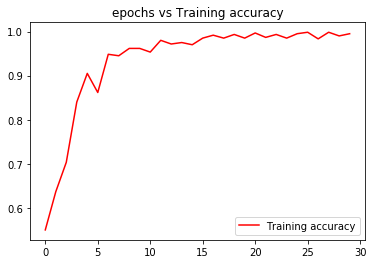

In [43]:
training_accuracy = Hist.history['acc']
training_loss = Hist.history['loss']

E = range(len(training_accuracy))
plt.plot(E, training_accuracy, color='red', label='Training accuracy')
plt.title('epochs vs Training accuracy')
plt.legend()

## Diagnosis

- Note that Supoort Vector Machine, Random Forest, and Logistic Regression Classification gives the same accuracy, would they show the same label for each image? Let's have a diagnosis.

In [44]:
print("Number of points with different labels from SVM and RF out of a total %d points: %d"
      % (y_test.size, (y_pred_rf!=y_pred_svm).sum()))

Number of points with different labels from SVM and RF out of a total 150 points: 5


In [45]:
print("Number of points with different labels from SVM and SGD out of a total %d points: %d"
      % (y_test.size, (y_pred_sgd!=y_pred_svm).sum()))

Number of points with different labels from SVM and SGD out of a total 150 points: 0


In [46]:
print("Number of points with different labels from SGD and RF out of a total %d points: %d"
      % (y_test.size, (y_pred_sgd!=y_pred_rf).sum()))

Number of points with different labels from SGD and RF out of a total 150 points: 5


- Here, Logistic Regression gives the same results with SVM. It's not surprising. Because we run SVM with linear kernel. So, both of them are based on linear discrimination.



- Now let's try non-linear kernel for SVM.

### Non-linear Kernel SVM

In [47]:
from sklearn.svm import SVC

start = dt.datetime.now()
clf = SVC(kernel='rbf', C=1E10)
y_pred_svm = clf.fit(x_train.T,y_train).predict(x_test.T)

print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, (y_test!=y_pred_svm).sum()))

/Users/flu16/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Elapsed time 0:00:05.288568
Number of mislabeled points out of a total 150 points: 66


In [48]:
from sklearn.svm import SVC

start = dt.datetime.now()
clf = SVC(kernel='poly', C=1E10)
y_pred_svm = clf.fit(x_train.T,y_train).predict(x_test.T)

print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, (y_test!=y_pred_svm).sum()))

/Users/flu16/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Elapsed time 0:00:01.462960
Number of mislabeled points out of a total 150 points: 6


In [49]:
from sklearn.svm import SVC

start = dt.datetime.now()
clf = SVC(kernel='sigmoid', C=1E10)
y_pred_svm = clf.fit(x_train.T,y_train).predict(x_test.T)

print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, (y_test!=y_pred_svm).sum()))

/Users/flu16/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Elapsed time 0:00:05.760690
Number of mislabeled points out of a total 150 points: 66


- Now we see that in this classification problem on images, linear discrimination is the best way.



- Furthermore, let's see the difference of SVM and RF

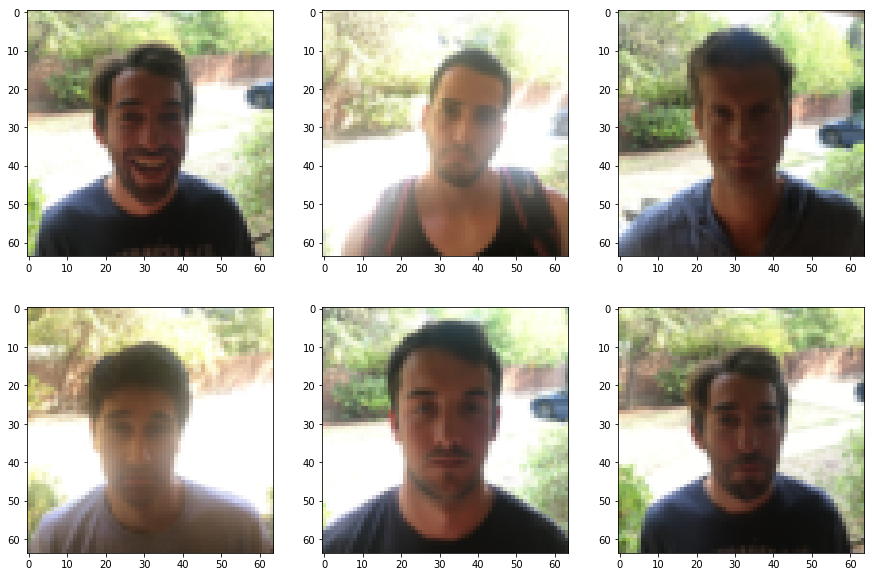

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
prol = [(0,0),(1,0),(0,1),(1,1),(0,2),(1,2)]
k = 0
for i in range(1,y_test.size):
    if y_pred_rf[i]!=y_pred_svm[i]:
        p,q = prol[k]
        axes[p][q].imshow(X_test[i])
        k += 1
        if k == 6:
            break

- Easy to find that except for the first graph, other five graph is very hard to judge whether he is smiling. their lip is almost horizontal. It's very surprised that SVM cannot judge the first graph. But we do not dig into the reason. 



- A good thinking is to summarize all prediction from every algorithm to get a one prediction. It seems like to summarize different professional suggestion. This method is effective only if different professional suggestions are based on different clues or thinkings.



- To try this thought, we use five classification algorithms and if over three of them give the same results, we certainly believe it's true. But we cannot use linear SGD and linear SVM at the same time. Because the classifying rules of them are the same. Its very like “Adaboost”, while we skip the training of the weights.



- Here we only have fout effective algorithms, now, let's introduce a new ensemble learning method: **Boosting.**

## Gradient Boosting Decision Tree Classification

In [51]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

start = dt.datetime.now()
clf = GBC(random_state=10)
y_pred_gbdt = clf.fit(x_train.T,y_train).predict(x_test.T)

print ("Elapsed time", dt.datetime.now()-start)
print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, (y_test!=y_pred_gbdt).sum()))

Elapsed time 0:00:47.214704
Number of mislabeled points out of a total 150 points: 7


## Ensemble Learning: Aggregation

- It's very similar to Adaboost, but here we do not use data set to determine the exact value for weights of each weak classfier. Because, we have run all of them, and all of their performance are close and we also delete others with bad performance. We also do not use iteration, to improve performance of each classifier.

In [270]:
#y_pred_agg = 2*y_pred_svm + 2.5*y_pred_cnn.reshape(-1) + 1.5*y_pred_rf + y_pred_gbdt + y_pred_lda
#y_pred_agg = [a >= 4 for a in y_pred_agg]

y_pred_agg = y_pred_svm + 0*y_pred_cnn.reshape(-1) + y_pred_rf + y_pred_gbdt + y_pred_lda
y_pred_agg = [a >=2  for a in y_pred_agg]

In [271]:
y_pred_agg = np.array(y_pred_agg)
y_pred_agg.shape

(150,)

In [272]:
print("Number of mislabeled points out of a total %d points: %d"
      % (y_test.size, (y_test!=y_pred_agg).sum()))

Number of mislabeled points out of a total 150 points: 3


For 12 th image, the correct label for this person is 0, while SVM gives 1,CNN gives 0, RF gives 1, GBDT gives 1, LDA gives 0.
For 63 th image, the correct label for this person is 0, while SVM gives 1,CNN gives 0, RF gives 1, GBDT gives 1, LDA gives 1.
For 136 th image, the correct label for this person is 0, while SVM gives 1,CNN gives 0, RF gives 1, GBDT gives 0, LDA gives 1.


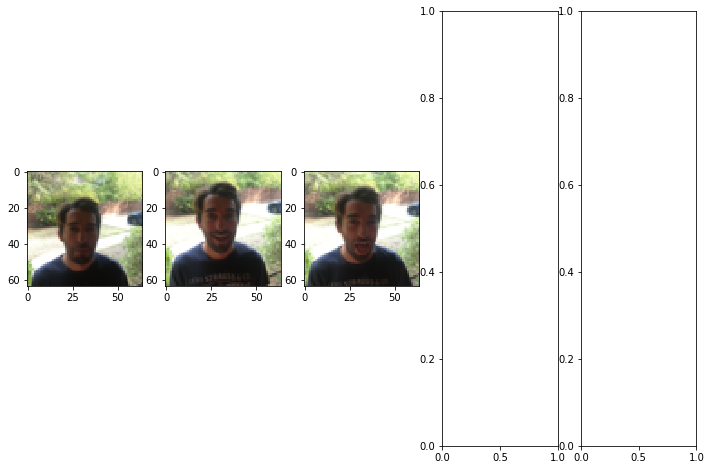

In [273]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 8))
k = 0
for i in range(1,y_test.size):
    if y_test[i]!=y_pred_agg[i]:
        axes[k].imshow(X_test[i])
        k += 1
        print("For %d th image, the correct label for this person is %d, while SVM gives %d,CNN gives %d, RF gives %d, GBDT gives %d, LDA gives %d." 
              %(i, y_test[i],y_pred_svm[i], y_pred_cnn.reshape(-1)[i], y_pred_rf[i], y_pred_gbdt[i], y_pred_lda[i]))
        if k == 5:
            break

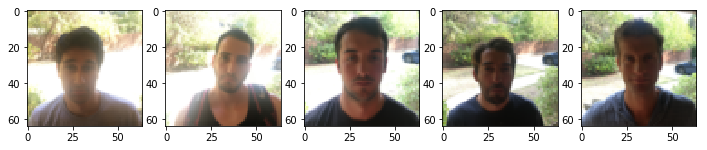

In [266]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 8))
k = 0
for i in range(1,y_test.size):
    if y_test[i]!=y_pred_svm[i]:
        axes[k].imshow(X_test[i])
        k += 1
        #print("For %d th image, the correct label for this person is %d, while SVM gives %d,CNN gives %d, RF gives %d, GBDT gives %d, LDA gives %d." 
        #      %(i, y_test[i],y_pred_svm[i], y_pred_cnn.reshape(-1)[i], y_pred_rf[i], y_pred_gbdt[i], y_pred_lda[i]))
        if k == 5:
            break

## Summary

# 画图

In [95]:
res_dic = {"kNN":(0.003494, 38), "QDA":(0.403724, 36), "LDA":(1.058039, 6), "Logistic Regression":(2.893167, 5), "Decission Tree":(1.777011, 14), "Random Forest":(5.573270, 6), 'Linear Kernel SVM':(1.329473, 5), "rbf kernal SVM":(5.288568, 66), "poly kernal SVM":(1.462960, 6), 'sigmoid kernal SVM':(5.760690, 66)}





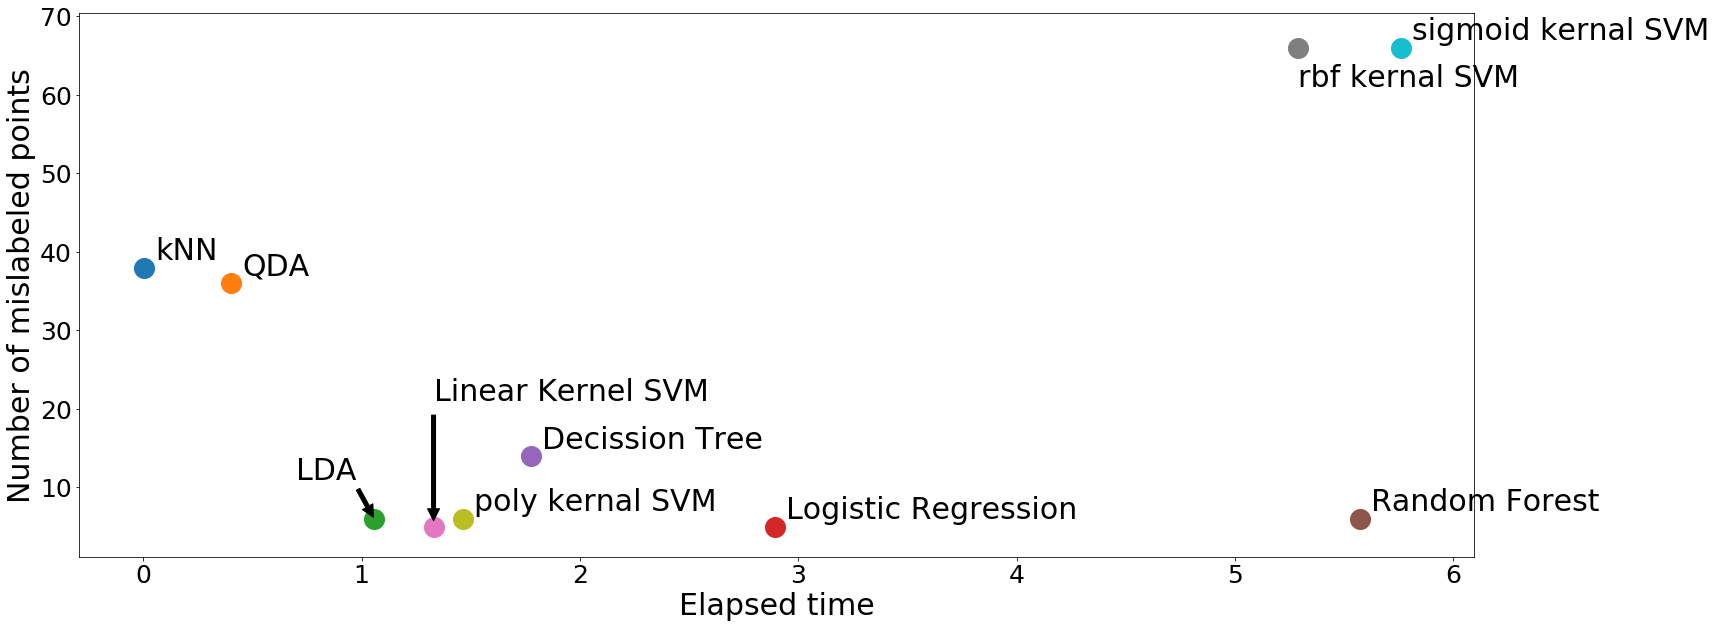

In [226]:
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 1}

plt.figure(figsize=(25, 10))
#设置标题  
ax.set_title('Scatter Plot',fontsize=20)  
#设置X轴标签  
plt.xlabel('Elapsed time',fontsize=30)  
plt.tick_params(labelsize=25) #X,Y轴下面的数字大小

#设置Y轴标签  
plt.ylabel('Number of mislabeled points',fontsize=30) 

for (k,v) in res_dic.items():
    plt.scatter(*v,400)
    if k == 'Linear Kernel SVM':
        plt.annotate(k,v,(v[0],v[1]+16),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=30)
    elif k =='LDA':
        plt.annotate(k,v,(v[0]-0.36,v[1]+5),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=30)
    elif k =='rbf kernal SVM':
        plt.annotate(k,v,(v[0],v[1]-5),fontsize=30)
    else:
        plt.annotate(k,v,(v[0]+0.05,v[1]+1),fontsize=30)
    